In [1]:
!pip install requests
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install --upgrade mplfinance
!pip install pyimgur

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)
--2021-04-27 12:37:09--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-27 12:37:09--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-04-27 12:37:09--  https://manag

In [2]:
!pip install --upgrade imgbox-cli

Requirement already up-to-date: imgbox-cli in /usr/local/lib/python3.7/dist-packages (0.0.2)


MA黃金交叉:
1590:亞德客-KY
MA死亡交叉:
KD黃金交叉:
2308:台達電
1303:南亞
2395:研華
9910:豐泰
KD死亡交叉:
3034:聯詠
3008:大立光
2382:廣達
2880:華南金
2105:正新
2408:南亞科


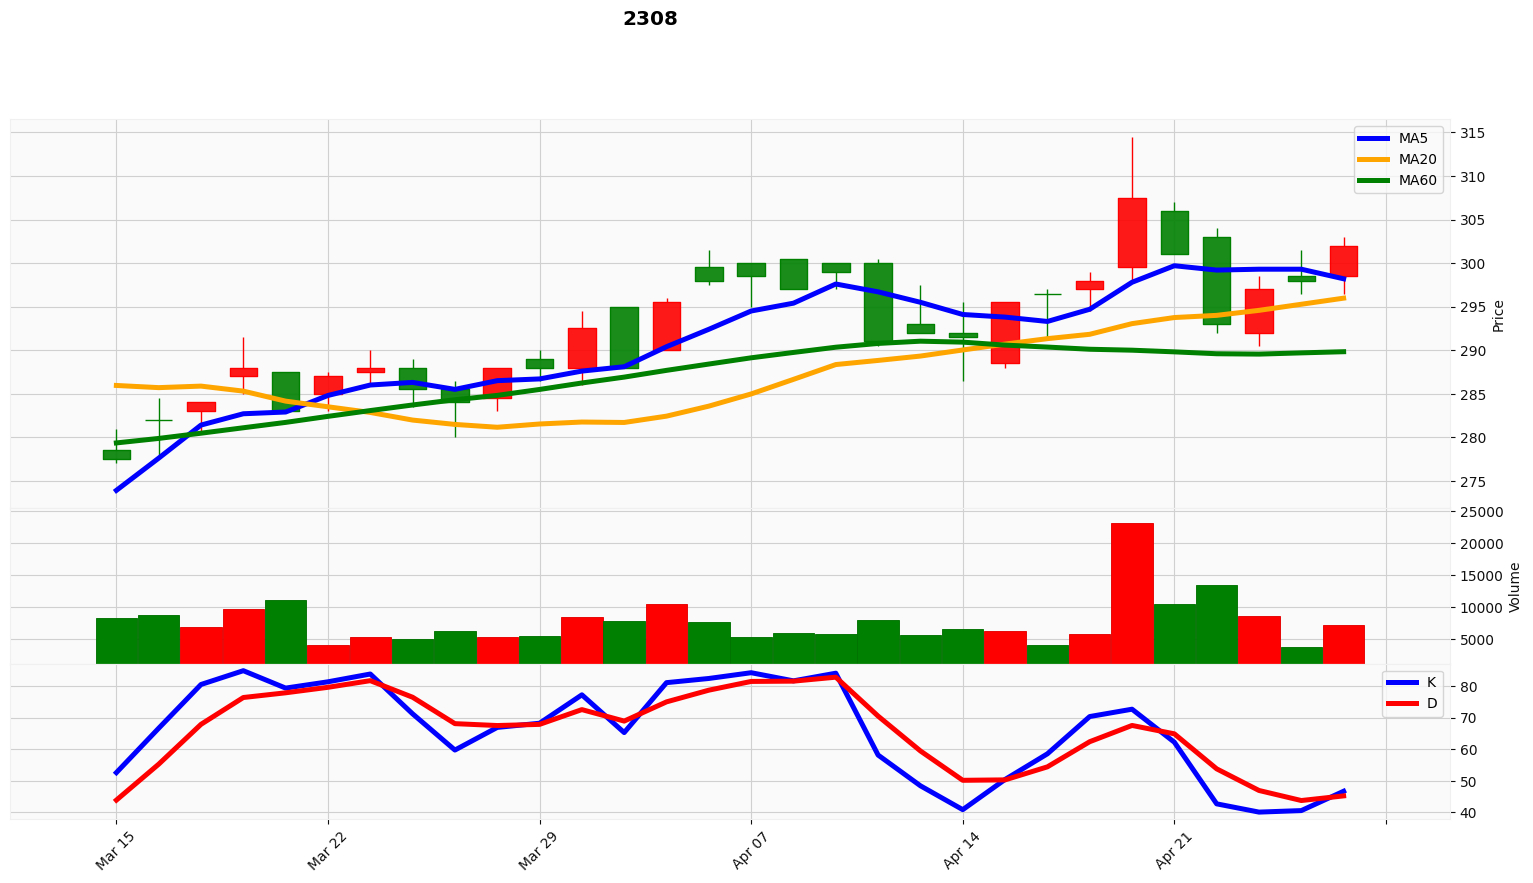

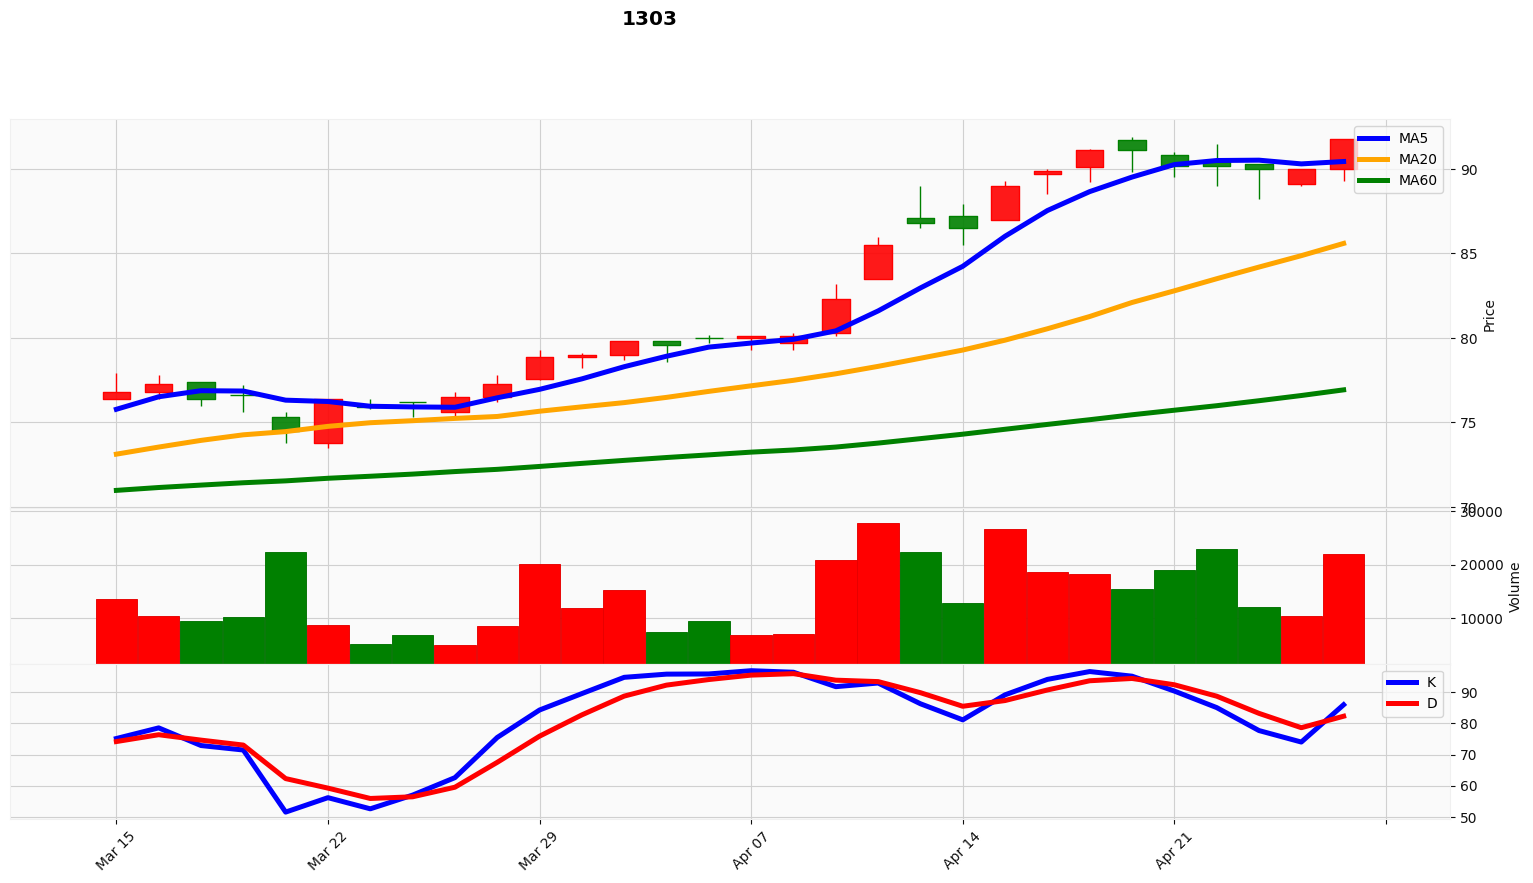

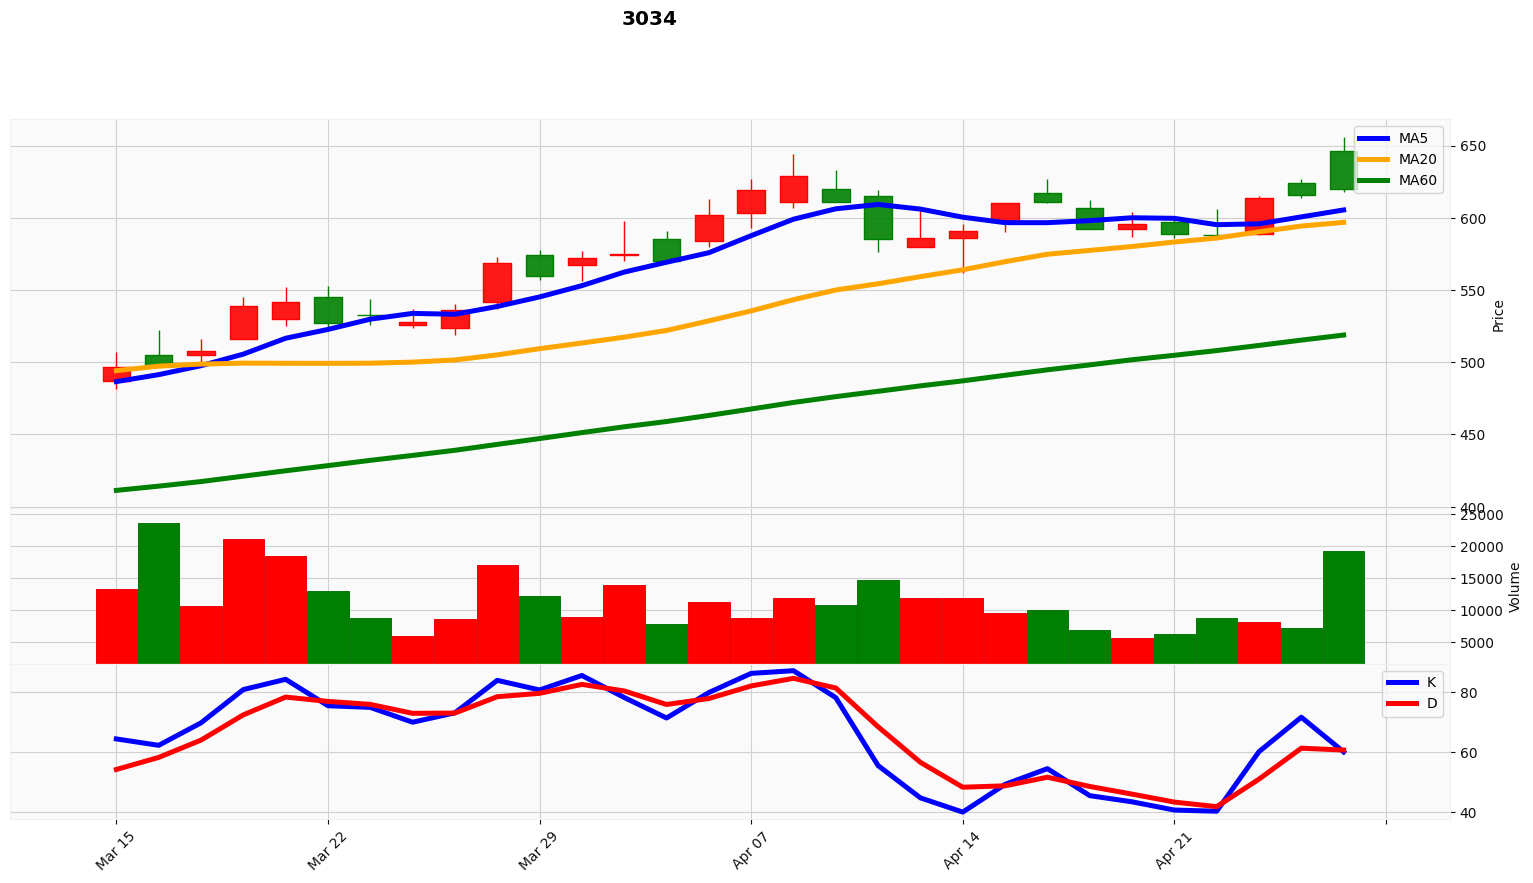

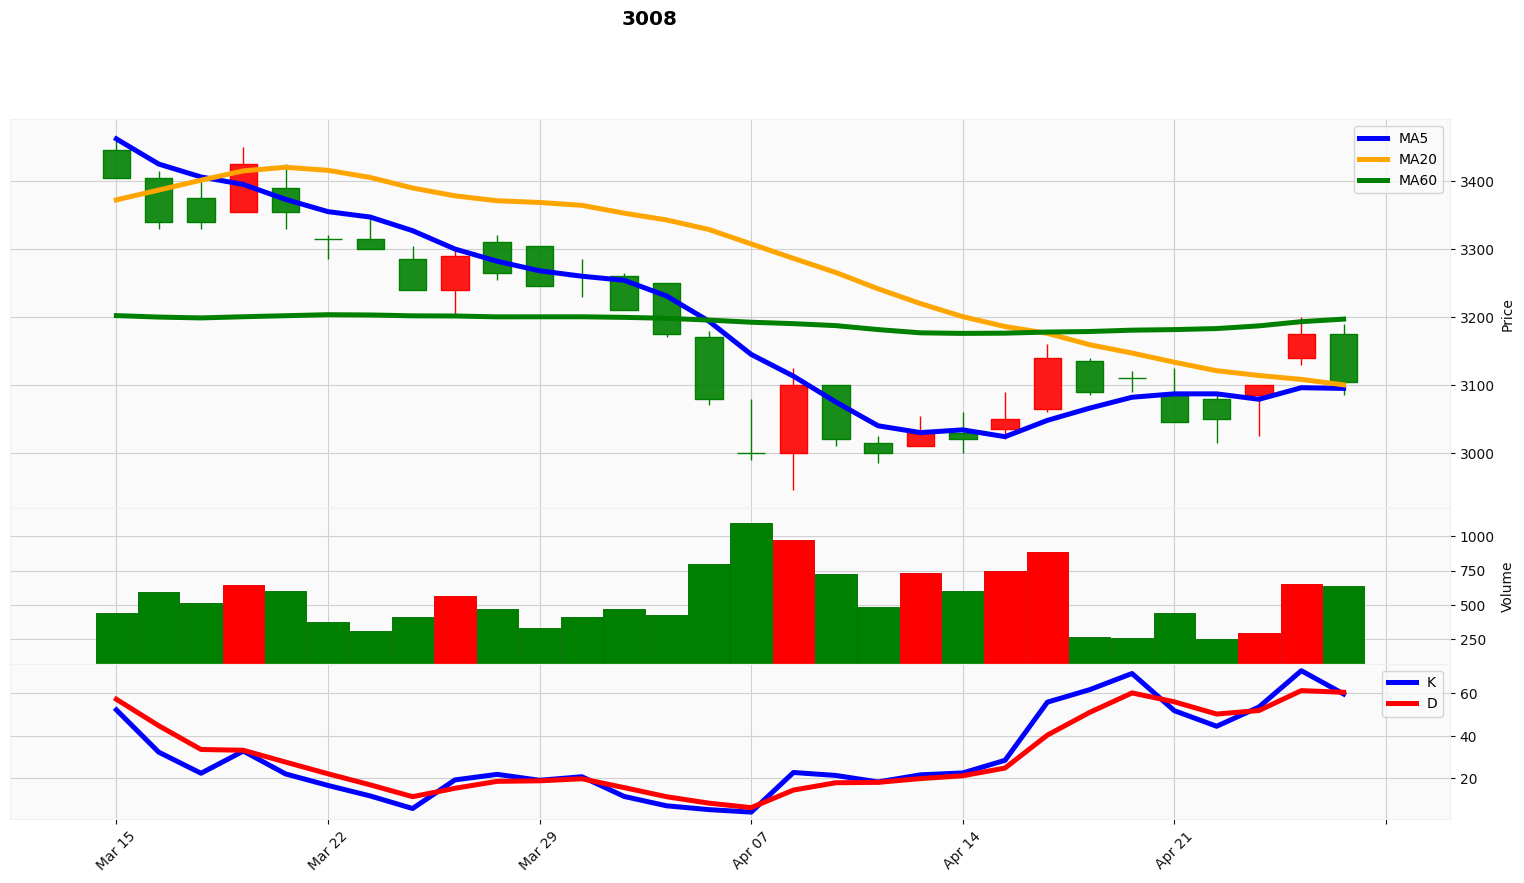

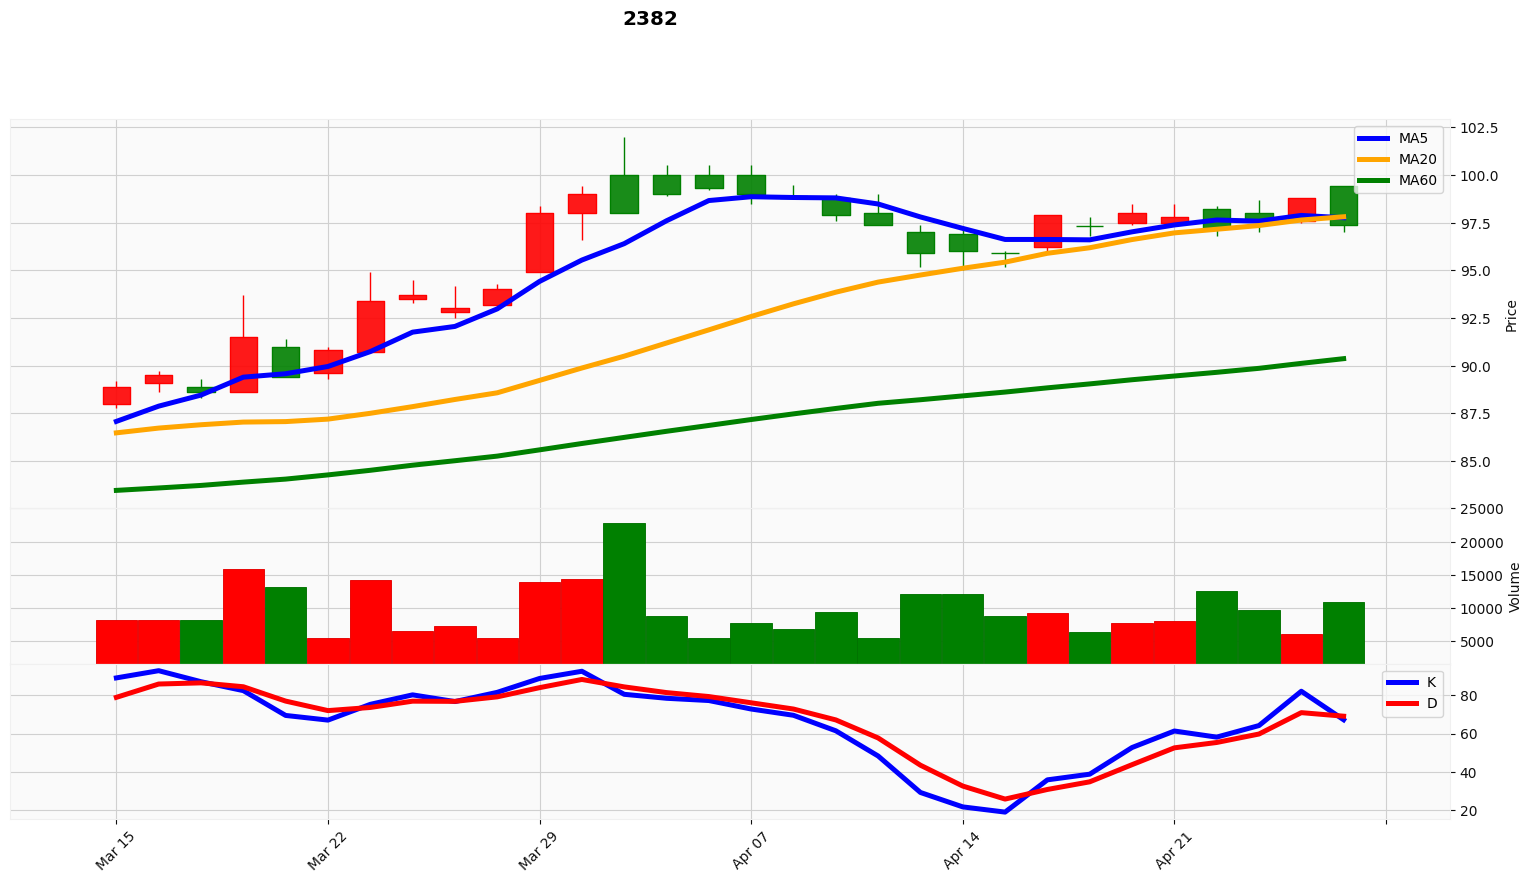

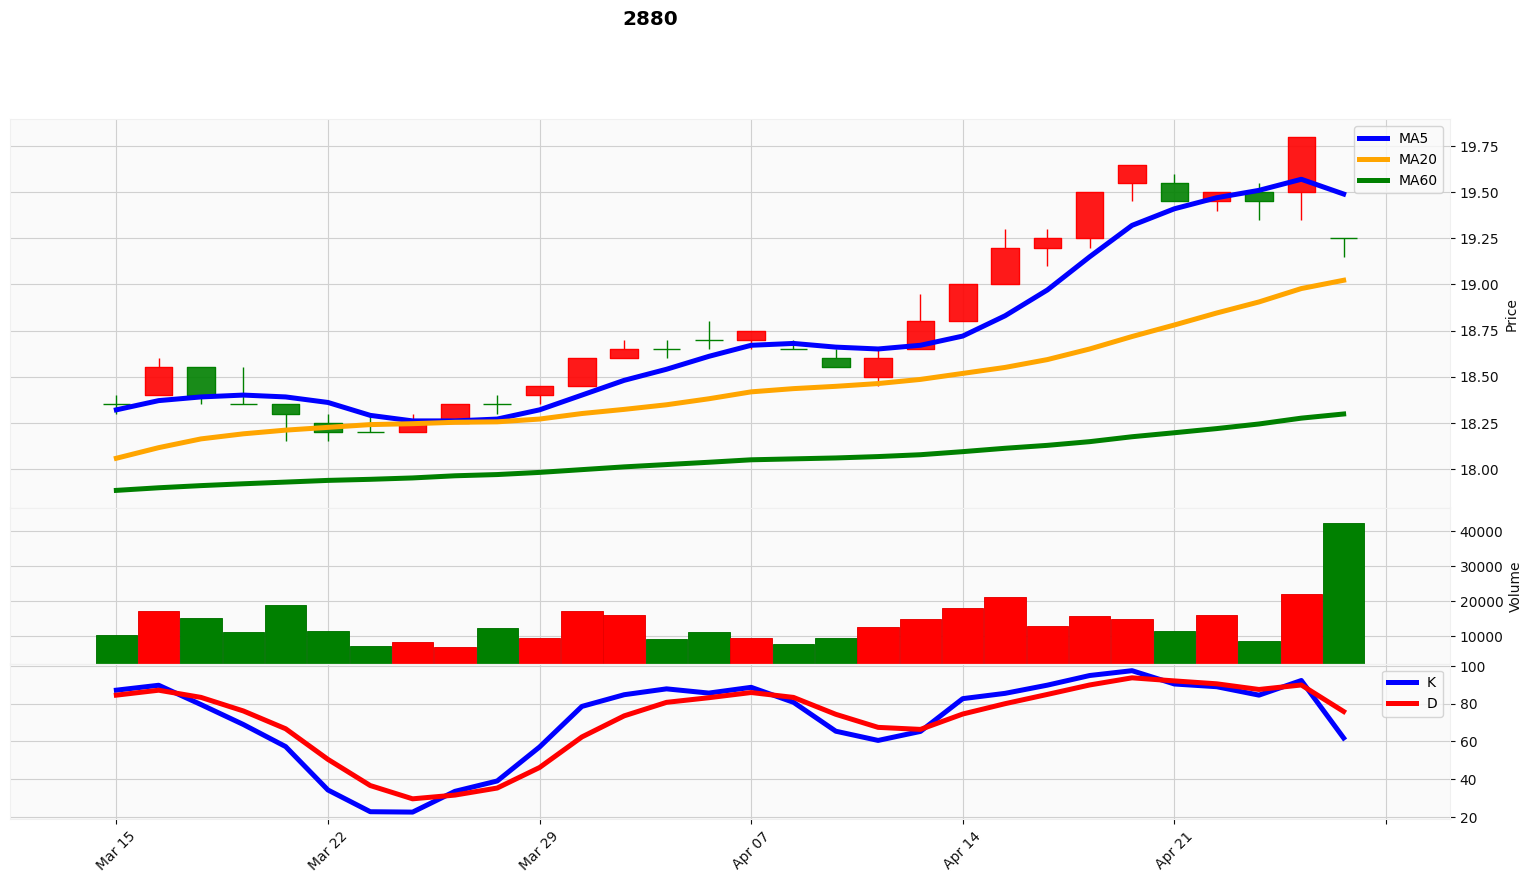

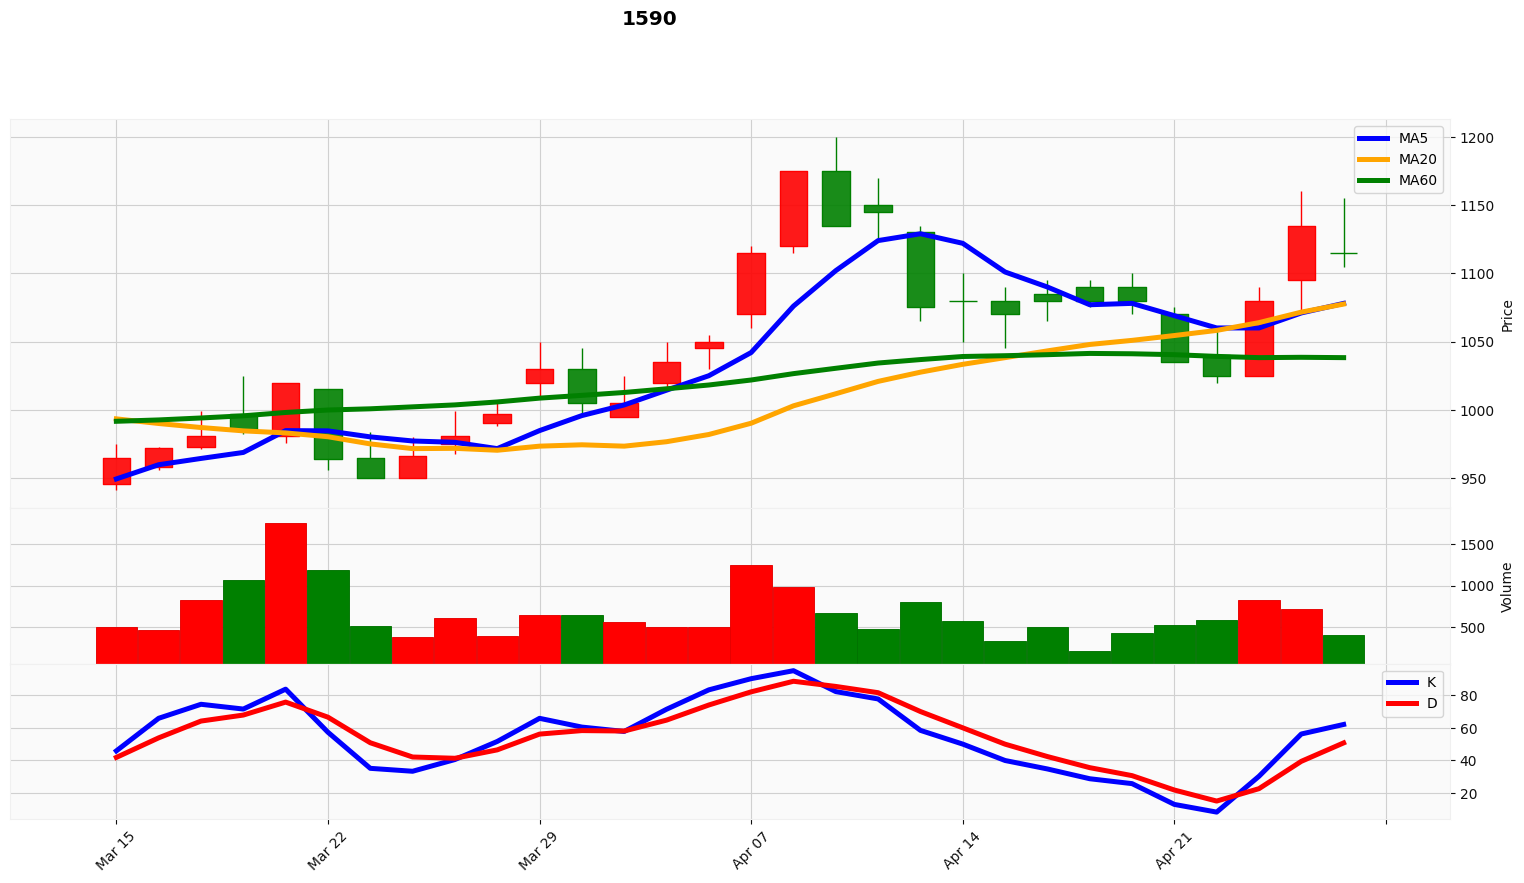

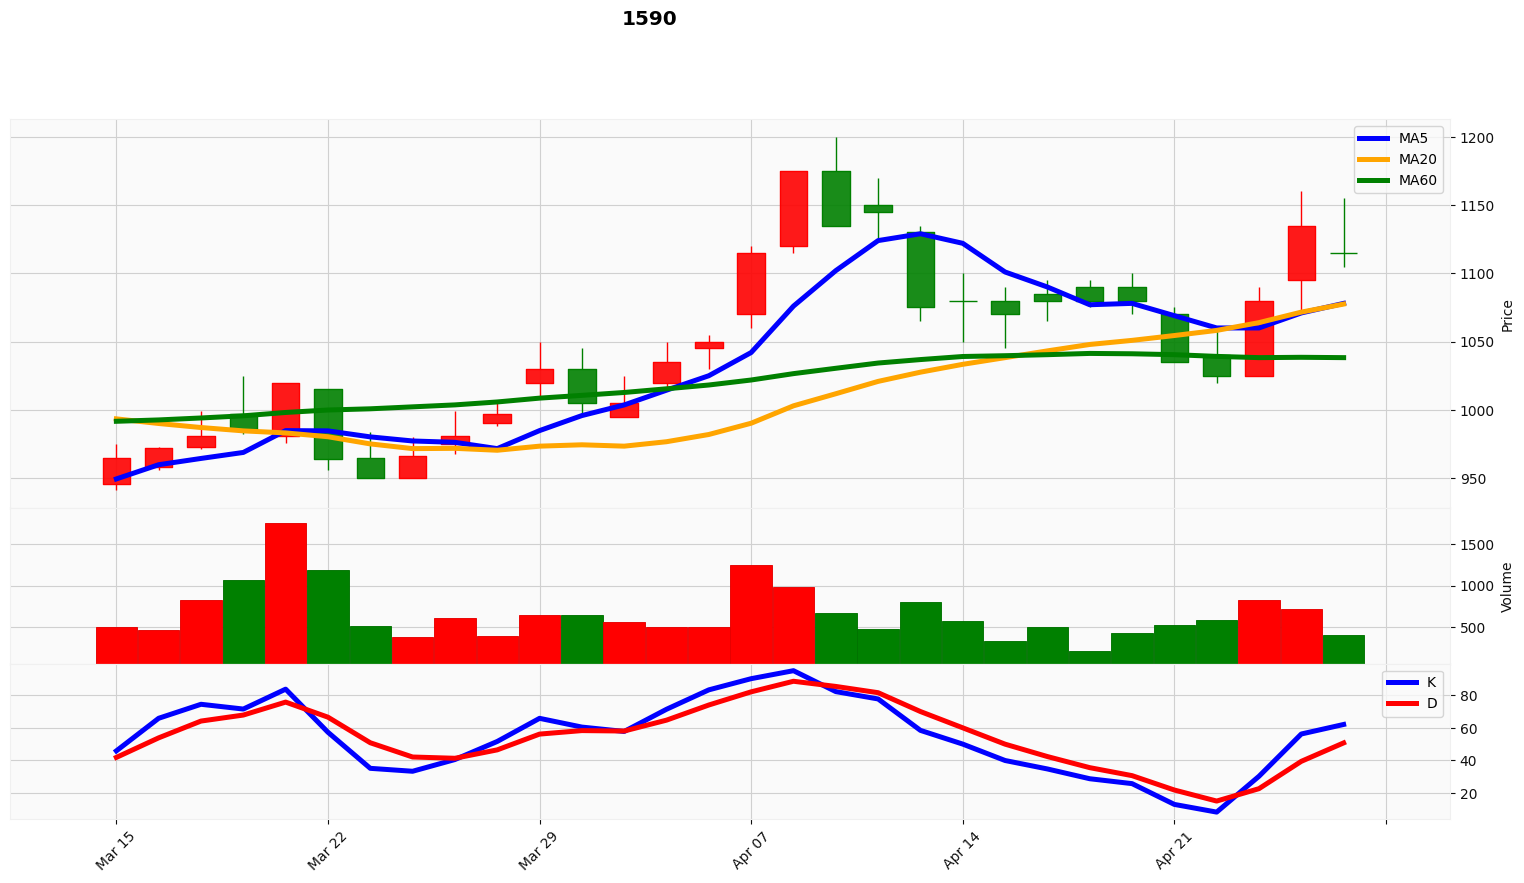

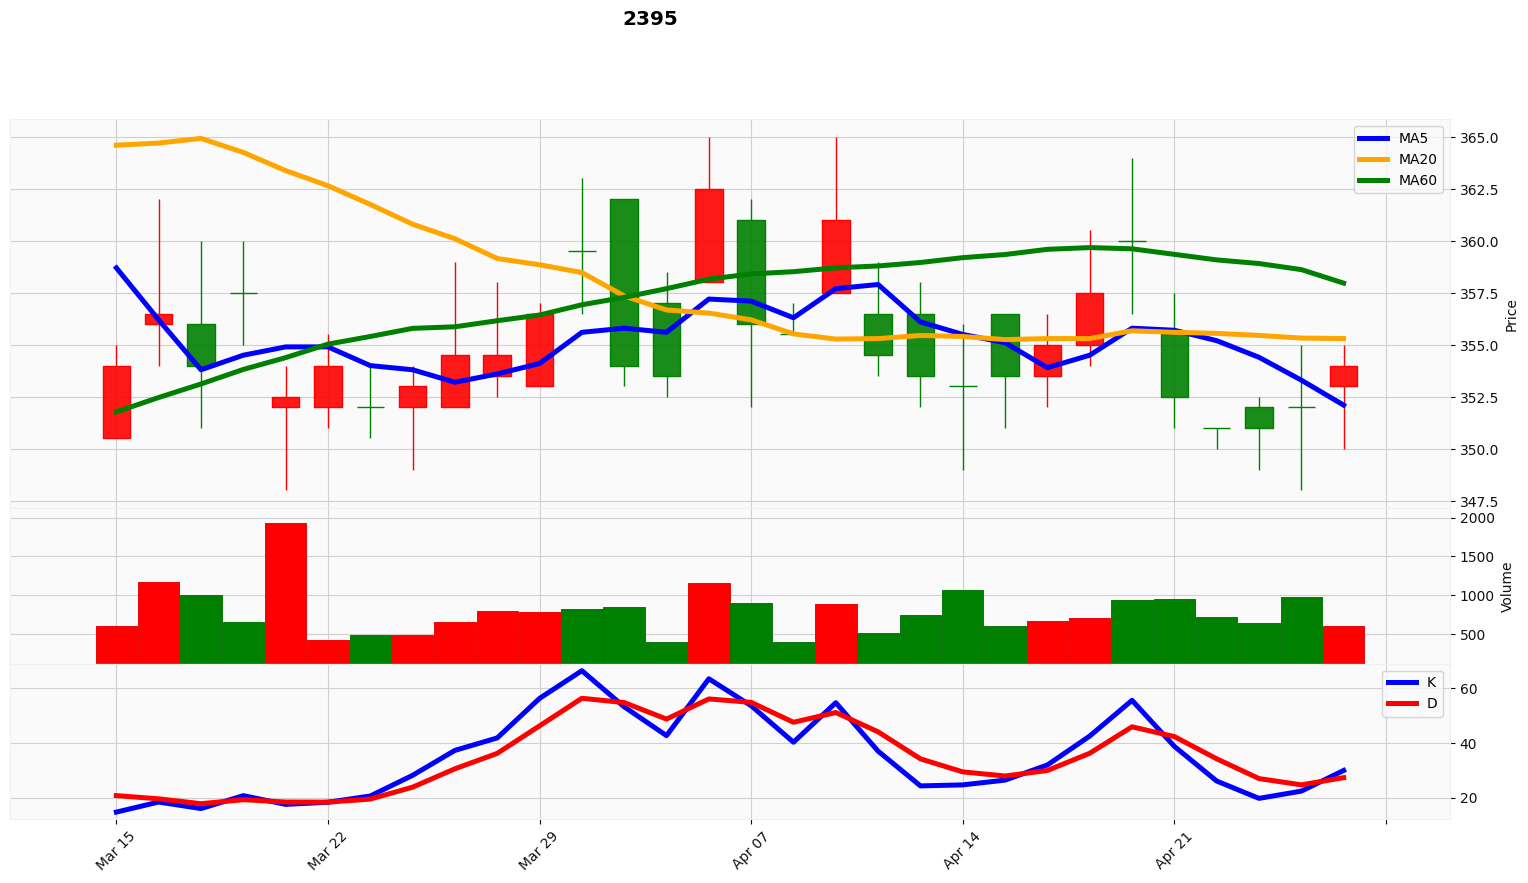

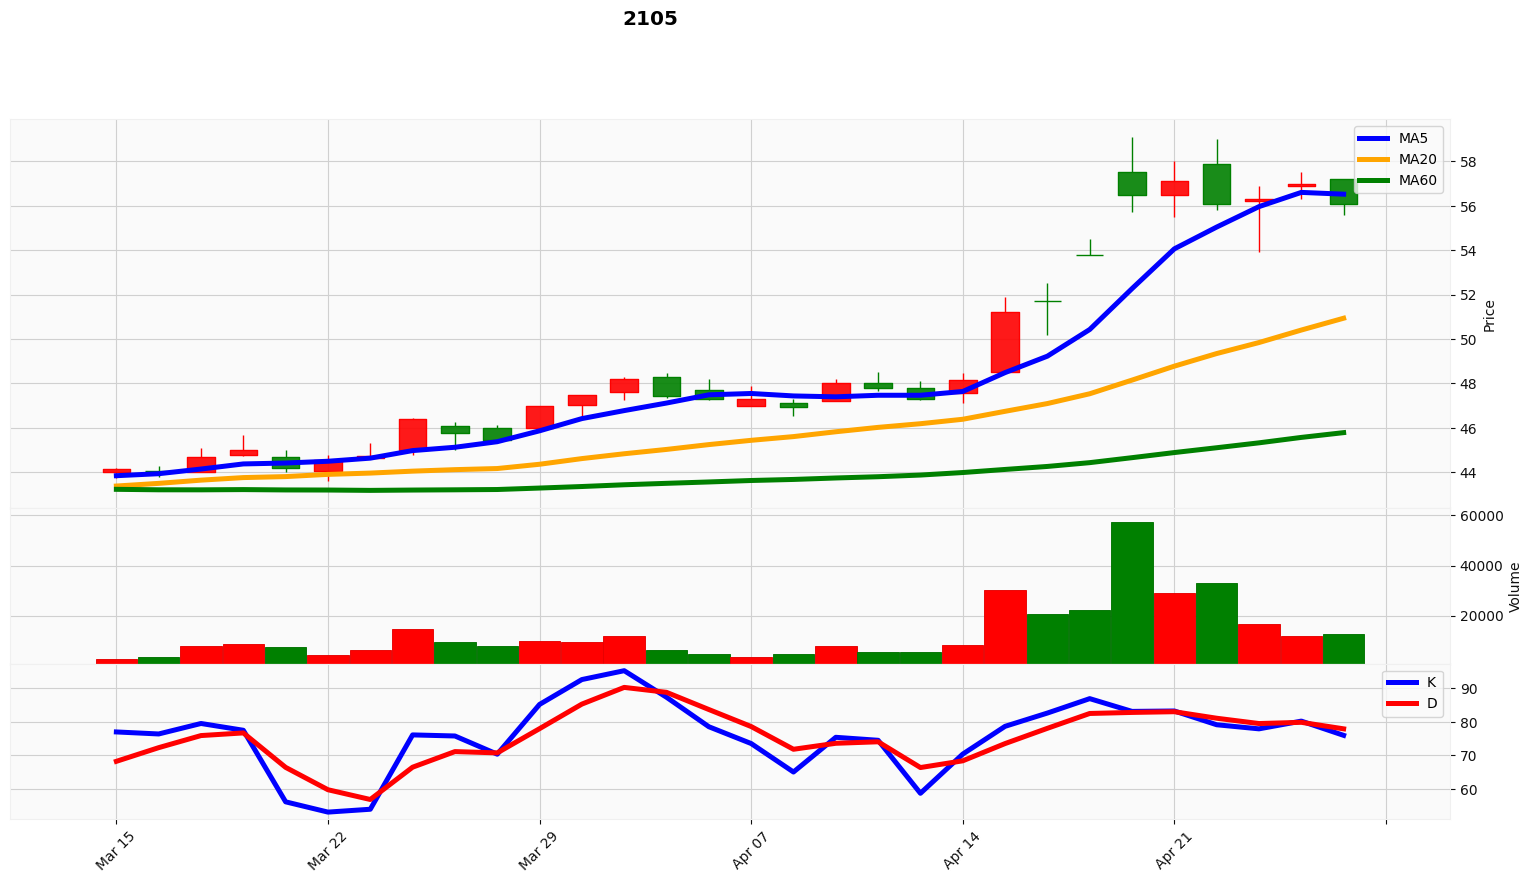

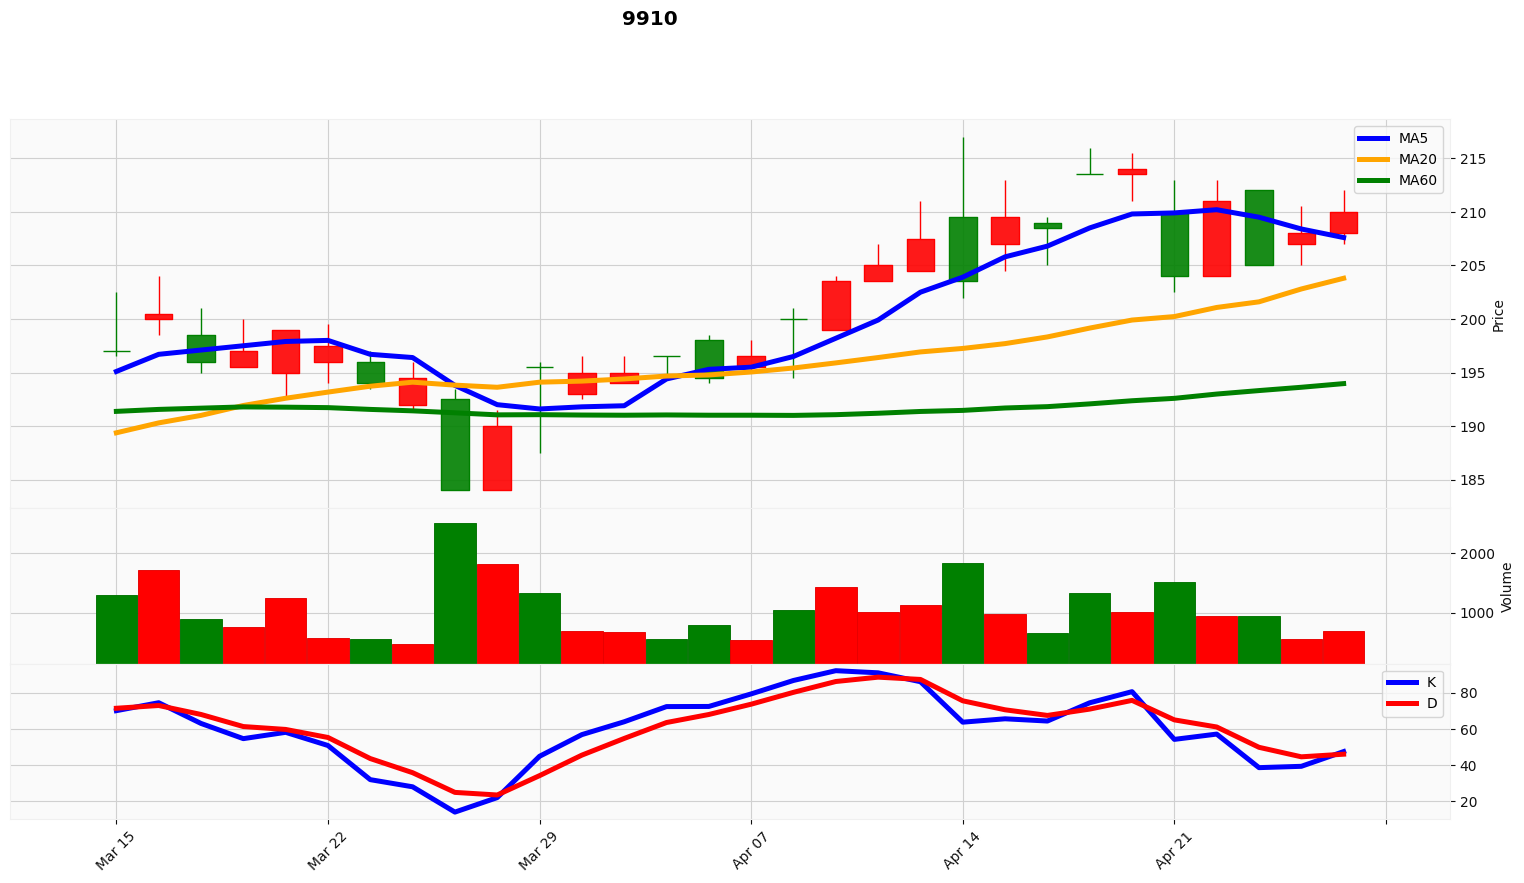

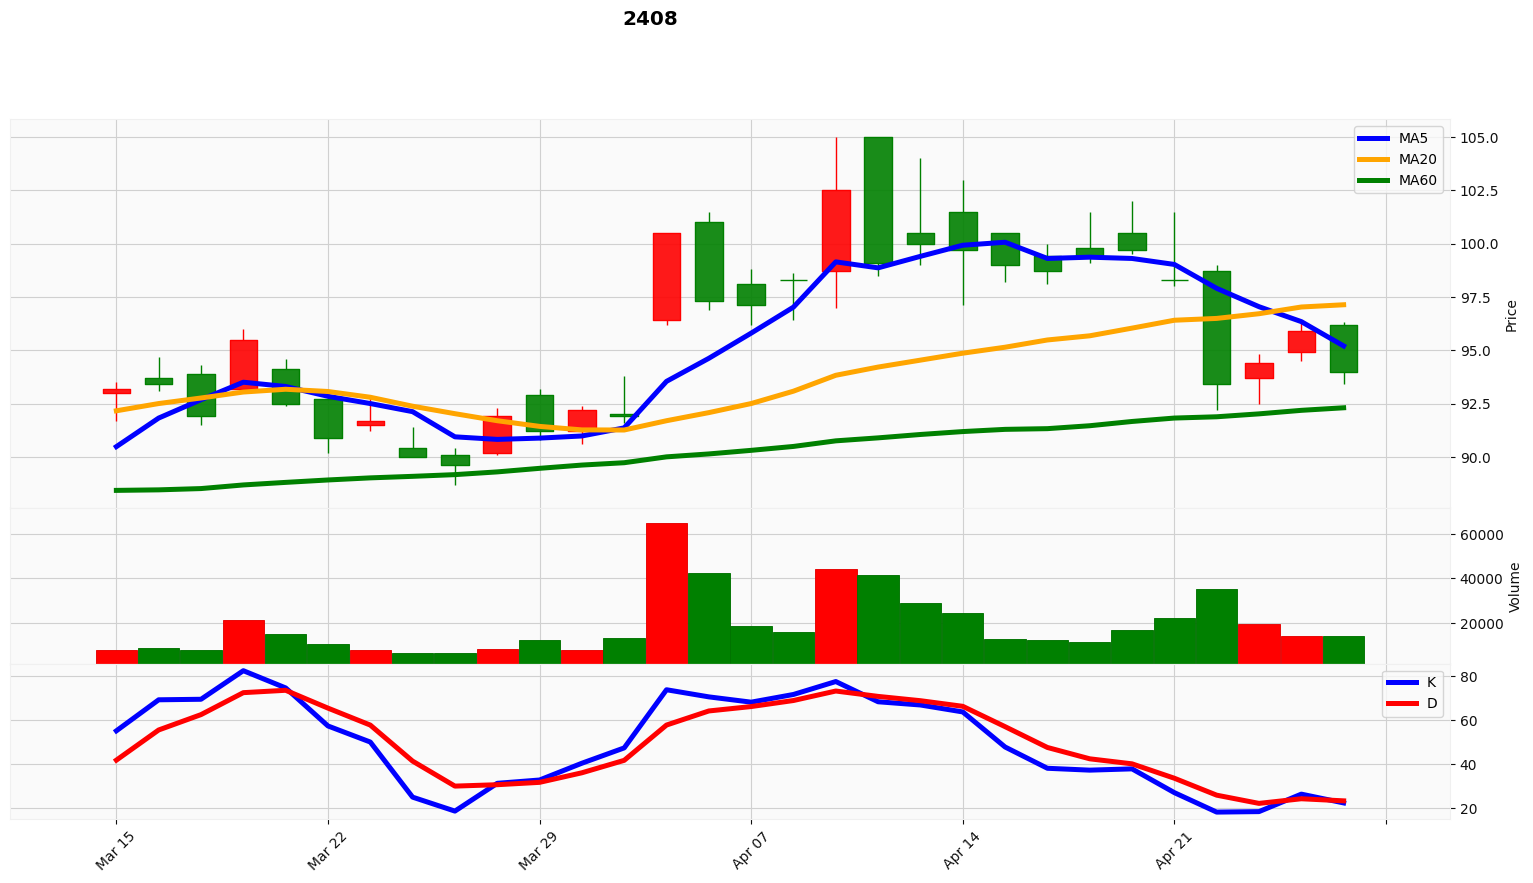

In [3]:
import requests
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import mplfinance as mpf
import pyimgur
import talib
from talib import abstract
from datetime import datetime, timedelta
from pandas import DataFrame
######

def analyze():
  closed = df.close #取出收盤價來算ma
  ma5=talib.SMA(closed, timeperiod=5).tail(30)
  ma10=talib.SMA(closed, timeperiod=10).tail(30)
  ma20=talib.SMA(closed, timeperiod=20).tail(30)
  ma60=talib.SMA(closed, timeperiod=60).tail(30) #算完再取最後30個
  
  k, d = talib.STOCH(df['high'], df['low'], df['close'],
                   fastk_period=9,slowk_period=3,
                   slowk_matype=1,slowd_period=3,
                   slowd_matype=1)

  if ma5[-1] > ma20[-1] and ma5[-2] < ma20[-2]: #週線突破月線
    goodbyma[stockID]=stockName
    ma_status=1
  elif ma5[-1] < ma20[-1] and ma5[-1] > ma20[-1]:#月線突破週線
    badbyma[stockID]=stockName
    ma_status=-1
  else:
    ma_status=0
  
  if k[-1] > d[-1] and k[-2] < d[-2]: #k突破d 黃金
    goodbykd[stockID]=stockName
    kd_status=1
  elif k[-1] < d[-1] and k[-2] > d[-2]: #d突破k 死亡
    badbykd[stockID]=stockName
    kd_status=-1
  else:
    kd_status=0

  if ma_status == 0:                    #(MA/KD)
    if kd_status == 0:                  #(0/0)
      value2=None
    elif kd_status == 1:                #(0/1)
      value2='K線突破D線'
    else: #kd_status == -1              #(0/-1)
      value2='D線突破K線'

  elif ma_status == 1:                  
    prints(ma5,ma10,ma20,ma60,k,d)
    if kd_status == 0:                  #(1/0)
      value2='MA5突破MA20'
    elif kd_status == 1:                #(1/1)
      value2='MA5突破MA20 & K線突破D線'
    else:    # elif kd_status == -1:    #(1/-1)
      value2='MA5突破MA20 & D線突破K線'

  else: # elif ma_status == -1:
    prints(ma5,ma10,ma20,ma60,k,d)
    if kd_status == 0:                  #(-1/0)
      value2='MA20突破MA5'
    elif kd_status == 1:                #(-1/1)
      value2='MA20突破MA5 & K線突破D線'
    else: #kd_status == -1:               #(-1/-1)
      value2='MA20突破MA5 & D線突破K線'

  if value2 != None:
    prints(ma5,ma10,ma20,ma60,k,d)
    line_notify(stockName+'('+stockID+')',value2,chart_link)
  else:None

def prints(ma5,ma10,ma20,ma60,k,d):

  # 算k, d後取最後30個
  k = k.tail(30)
  d = d.tail(30)

  # 新增子圖(kd&ma)
  add_plot =[mpf.make_addplot(k, panel=2, color="b"),
           mpf.make_addplot(d, panel=2, color="r"),
           mpf.make_addplot(ma5, panel=0, color="blue"),
           mpf.make_addplot(ma20, panel=0, color="orange"),
           mpf.make_addplot(ma60, panel=0, color="green")]
           
  # K線所需的資料也取最後30個
  klines=df.tail(30)

  # 圖的樣式
  mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
  s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

  #繪圖
  fig, axes = mpf.plot(klines,
                     type='candle',
                     style =s,
                     volume=True,
                     columns= ('open', 'high', 'low', 'close', 'vol'),
                     title=stockID,
                     returnfig=True,
                     addplot=add_plot,
                     figsize=(20,10),)
  #圖上做標籤
  axes[0].legend(['MA5','MA20','MA60'])
  axes[4].legend(['K','D'])

  #存檔
  fig.savefig('testsave.png',
              bbox_inches='tight',
              pad_inches=0.1,
              format='png',
              dpi=100)

  #imgur#
  CLIENT_ID="1ab4a10fcb67ce9"
  PATH = "testsave.png"
  im = pyimgur.Imgur(CLIENT_ID)
  uploaded_image = im.upload_image(PATH, title=yyyymmdd+'_'+stockName+'_'+stockID)
  
  #全域變數
  global chart_link
  chart_link = uploaded_image.link

def line_notify(value1,value2,value3):
######記得更改 
  iftttevent='0424'
  iftttkey='c7OHHrPSmTZKdTp5c7utuc'
######
  url='https://maker.ifttt.com/trigger/'+iftttevent+'/with/key/'+iftttkey+'?value1='+value1+'&value2='+value2+'&value3='+value3
  requests.get(url)
 
#0050weightapi:https://www.yuantaetfs.com/api/StkWeights?date= &fundid=1066

yyyymmdd = datetime.now().strftime('%Y%m%d')
weight_data = requests.get('https://www.yuantaetfs.com/api/StkWeights?date='+ yyyymmdd +'&fundid=1066')
weight_json = json.loads(weight_data.text)
df_weight = pd.DataFrame(weight_json)

goodbyma={}
badbyma={}
goodbykd={}
badbykd={}

for i in range(len(df_weight)):
  stockID = df_weight.code[i]
  stockName = df_weight.name[i]
  # print('==='+stockID+' Start===')
  url='https://tw.quote.finance.yahoo.net/quote/q?type=ta&perd=d&mkt=10&sym='+stockID+'&v=1'
  r=requests.get(url)
  str1=r.text[5:-2]
  dict1=eval(json.dumps(eval(str1)))
  ary1=[]
  for i in range(len(dict1['ta'])):
    ary1.append({'date':dict1['ta'][i]['t'],'open':dict1['ta'][i]['o'],'high':dict1['ta'][i]['h'],'low':dict1['ta'][i]['l'],'close':dict1['ta'][i]['c'],'vol':dict1['ta'][i]['v']})
  df = pd.DataFrame(ary1)
  df['date'] = df['date'].apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))
  df = df.set_index('date')
  analyze()
#   # print('==='+stockID+' End===')

print('MA黃金交叉:')
for key,value in goodbyma.items():
    print('{key}:{value}'.format(key = key, value = value),sep=", ")

print('MA死亡交叉:')
for key,value in badbyma.items():
    print('{key}:{value}'.format(key = key, value = value),sep=", ")

print('KD黃金交叉:')
for key,value in goodbykd.items():
    print('{key}:{value}'.format(key = key, value = value),sep=", ")

print('KD死亡交叉:')
for key,value in badbykd.items():
    print('{key}:{value}'.format(key = key, value = value),sep=", ")
